# Data Vectorization
In this notebook, the text data will be vectorized using different vectorization techniques. The most important ones used here are the **TF-IDF** and the **Word2Vec**. In the tf-idf, the vectorization will be tried using the unigrams, bigrams, and the trigrams as well. Then we will check which one is giving better categorization between the different categories.

This can be done by using reducing the number of dimensions using the TSNE or PCA. PCA is used here as it is computationally easy. The same will be performed on the word2vec vectorized data.

Finally whichever is giving the best partition between the data, that will be finalized to proceed further.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import joblib

----------------------

Here, for the word2vec model the zip file containing different word2vec models is downloaded. Among the models, the **glove.6B.300d.txt** model is used for the vectorization of the text data.

--------

In [2]:
from zipfile import ZipFile
file_name="glove.6B.zip"
with ZipFile(file_name,'r') as zip_file:
  zip_file.extractall()

In [2]:
w2v_dict = dict()
f = open('glove.6B.300d.txt', encoding='cp932', errors='ignore')
for line in f:
	values = line.split()
	word = values[0]
	vec = np.asarray(values[1:], dtype='float32')     
	w2v_dict[word] = vec
f.close()
print('Loaded %s word vectors.' % len(w2v_dict))
w2v_words =  set(w2v_dict.keys())

Loaded 399906 word vectors.


In [2]:
data = pd.read_excel('categorized_data.xlsx', index_col = 0)
data

,Toxic,Severe Toxic,Obscene,Threat,Insult,Hatred,Cleaned Comments,Categories,Toxicity Percentage
0,0,0,0,0,0,0,explanation edits make username hardcore metal...,Harmless or Positive Commentary,0
1,0,0,0,0,0,0,aww match background colour seemingly stuck th...,Harmless or Positive Commentary,0
2,0,0,0,0,0,0,hey man really try edit war guy constantly rem...,Harmless or Positive Commentary,0
3,0,0,0,0,0,0,make real suggestion improvement wonder sectio...,Harmless or Positive Commentary,0
4,0,0,0,0,0,0,sir hero chance remember page,Harmless or Positive Commentary,0
...,...,...,...,...,...,...,...,...,...
165999,0,0,0,0,0,0,second time ask view completely contradict cov...,Harmless or Positive Commentary,0
166000,0,0,0,0,0,0,ashamed horrible thing put talk page,Harmless or Positive Commentary,0
166001,0,0,0,0,0,0,spitzer umm there actual article prostitution ...,Harmless or Positive Commentary,0
166002,0,0,0,0,0,0,look like actually put speedy first version de...,Harmless or Positive Commentary,0


--------------

For different combinations of the labels, a particular name or phrase is given to identify that combination separately. This will make the output during the model deployment a lot more user friendly. Also a toxicity percentage for each unique label combination is generated. This could tell the user the toxicity percentage in a particular sentence.

--------------

In [6]:
data['Categories'].value_counts()

Harmless or Positive Commentary    142565
Toxic                                5647
Malicious Indecency                  3789
Noxious                              1753
Offensive                            1214
Intense Malicious Disparagement       989
Venomous Reprehension                 618
Obscene                               315
Insult                                301
Excessive Malevolence                 264
Vulgar Reproach                       178
Intense Contamination                 157
Virulent Hostility                    136
Hostile Disdain                       134
Dangerous Provocation                 130
Menacing                              111
Overwhelming Menace                    64
Malevolent Vulgarity                   56
Hatred                                 54
Intense Toxicity                       41
Harmful Repugnance                     35
Overwhelming Hostility                 31
Offensive Animosity                    28
Threat                            

In [14]:
data[data['Categories'] != 'Harmless or Positive Commentary']

,Toxic,Severe Toxic,Obscene,Threat,Insult,Hatred,Cleaned Comments,Categories,Toxicity Percentage
6,1,1,1,0,1,0,cocksucker piss around work,Intense Malicious Disparagement,90
19,1,0,0,0,0,0,hey talk exclusive group taliban good destroy ...,Toxic,40
23,1,0,0,0,0,0,bye look come think comming back tosser,Toxic,40
49,1,0,1,0,1,1,gay antisemmitian archangel white tiger meow g...,Venomous Reprehension,80
50,1,0,1,0,1,0,fuck filthy mother as dry,Malicious Indecency,70
...,...,...,...,...,...,...,...,...,...
165927,1,0,1,0,1,1,previous conversation fuck shit eating liberal...,Venomous Reprehension,80
165947,1,0,0,0,1,0,mischievious pubic hair,Offensive,50
165974,1,0,1,0,1,0,absurd edits absurd edit great white shark tot...,Malicious Indecency,70
165979,1,0,0,0,1,0,hey listen ever delete edits ever annoy wwe ro...,Offensive,50


In [15]:
data_toxic = data[data['Categories'] != 'Harmless or Positive Commentary']

In [16]:
data_toxic.to_excel('categorized_toxic_data.xlsx')

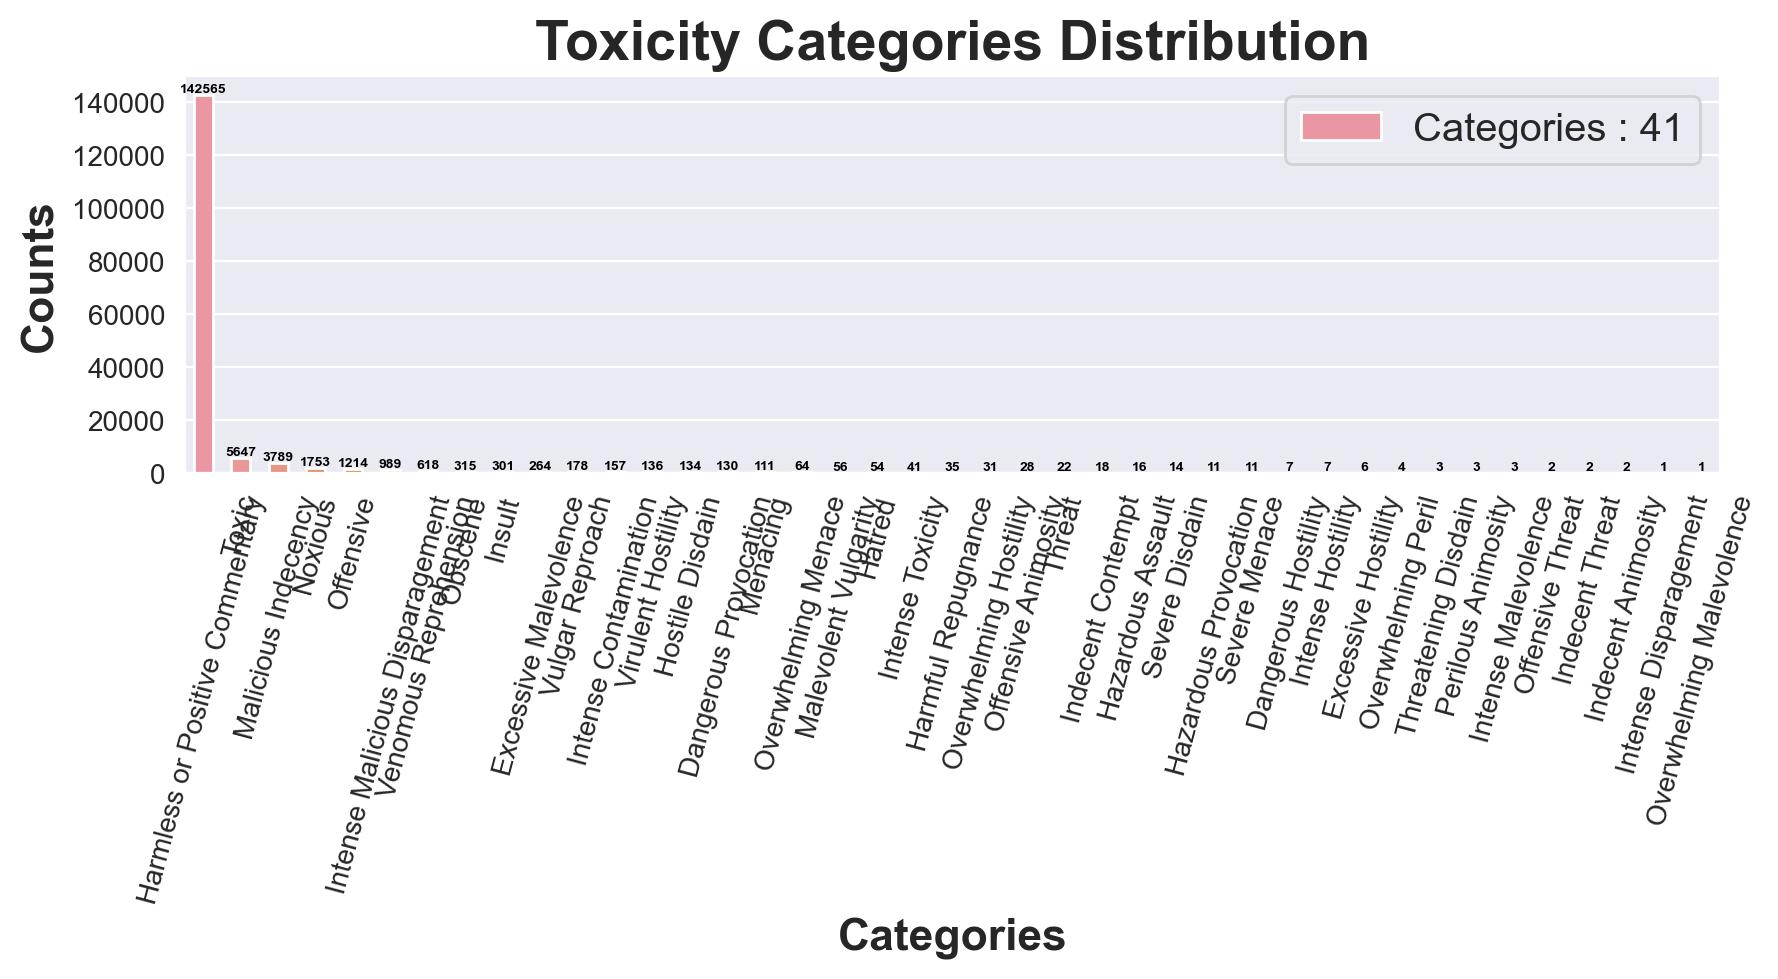

In [10]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= data['Categories'].value_counts().index, y= data['Categories'].value_counts(), width=0.5,
                 data= data, ax= axe, label= 'Categories : {}'.format(len(data['Categories'].unique())))

axe.set_xlabel('Categories', size=16,fontweight = 'bold')
axe.set_ylabel('Counts', size=16,fontweight = 'bold')
plt.xticks(rotation = 75)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Toxicity Categories Distribution', fontsize= 20, fontweight= 'bold')
rcParams = {'xtick.labelsize':'5','ytick.labelsize':'5','axes.labelsize':'5'}
for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 5)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

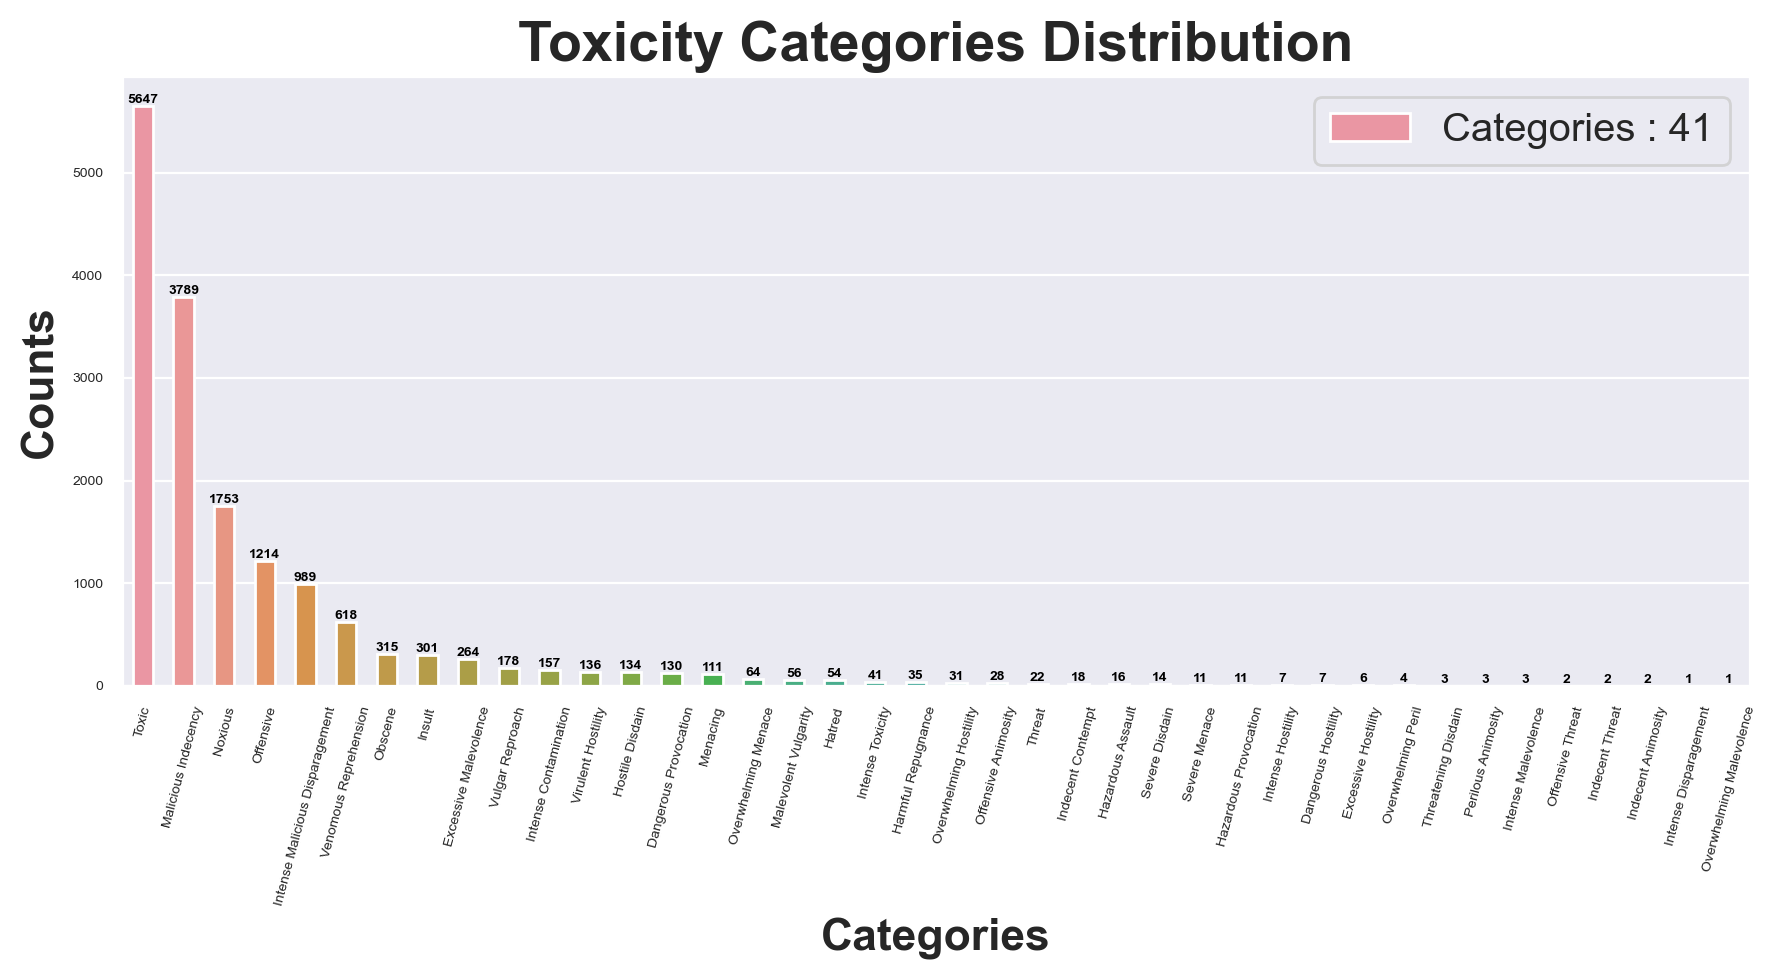

In [11]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= data_toxic['Categories'].value_counts().index, y= data_toxic['Categories'].value_counts(), width=0.5,
                 data= data_toxic, ax= axe, label= 'Categories : {}'.format(len(data['Categories'].unique())))

axe.set_xlabel('Categories', size=16,fontweight = 'bold')
axe.set_ylabel('Counts', size=16,fontweight = 'bold')
plt.xticks(rotation = 75)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Toxicity Categories Distribution', fontsize= 20, fontweight= 'bold')
rcParams = {'xtick.labelsize':'5','ytick.labelsize':'5','axes.labelsize':'5'}
for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 5)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

## Splitting the data into x and y

In [3]:
x = data['Cleaned Comments']
y = data.iloc[:, :6]

In [4]:
y

,Toxic,Severe Toxic,Obscene,Threat,Insult,Hatred
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
165999,0,0,0,0,0,0
166000,0,0,0,0,0,0
166001,0,0,0,0,0,0
166002,0,0,0,0,0,0


## Vectorization
There are two different approaches to vectorize the data. One is the **TF-IDF** and the other is the **Word2Vec**. These two techniques will be used here. After that which one gives the better result will be used during the model building

### 1. TF-IDF

In the **TF-IDF** method we can vectorize the text data by words or phrases which can called as unigrams for just each word vectorization and bigrams for a two word phrase vectorization and trigrams for three word phrase vectorization. Vectorization simply converts the count or importance of each word in a document. In this way it converts the words in all the documents in the corpus into numbers.

### 1.1 Unigram TF-IDF

In [10]:
unigram_tfidf = TfidfVectorizer(min_df=10,max_features=300,ngram_range=(1,1),stop_words='english')

In [21]:
import pickle
with open('unigram_tfidf.pkl', 'wb') as fin:
    pickle.dump(unigram_tfidf, fin)

In [11]:
x = x.apply(lambda x: str(x))

In [12]:
x_uni_tfidf = unigram_tfidf.fit_transform(x)

In [16]:
x_uni_tfidf_df = pd.DataFrame(x_uni_tfidf.toarray())

In [18]:
x_uni_tfidf_df.to_csv('encoded_uni_tfidf.csv')

In [15]:
print(pd.DataFrame(x_uni_tfidf.toarray()))

        0    1    2    3    4         5    6    7    8    9    ...  290  \
0       0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
...     ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...   
158738  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
158739  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
158740  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
158741  0.0  0.0  0.0  0.0  0.0  0.362317  0.0  0.0  0.0  0.0  ...  0.0   
158742  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   

             291  292  293  294  295  296  297  298  299  
0       0.000000  0.0  0.0  0.0  0.0  0.

----------

Getting the top tf-idf values per class

-----

In [26]:
top_tf_idf_val=[]
for col in y.columns:
    index=y[y[col]==1].index
    filtered_data=x.loc[index]
    vec_data=unigram_tfidf.transform(filtered_data)
    vec_data=vec_data.A

    #finding the indices of top TF-IDF values across the output

    indices=np.dstack(np.unravel_index(np.argsort(vec_data.ravel()), vec_data.shape))[0][::-1]
    feat=unigram_tfidf.get_feature_names_out()
    avg_tf_idf_scores=dict()

    for index in indices:
        if feat[index[1]] in avg_tf_idf_scores:
            value=avg_tf_idf_scores[feat[index[1]]]
            value.append(vec_data[index[0]][index[1]])
            avg_tf_idf_scores[feat[index[1]]]=value
        else:
            avg_tf_idf_scores[feat[index[1]]]=[vec_data[index[0]][index[1]]]

    # TF-IDF value is not same for the same word. as it is depends on 
    #TF value and IDF value
    #TF value will change based on the input. so finding average TF-IDF value

    for key in avg_tf_idf_scores:

        value=np.array(avg_tf_idf_scores[key])
        avg_tf_idf_scores[key]= np.mean(value)

    avg_tf_idf_scores={k: v for k, v in sorted(avg_tf_idf_scores.items(),
                                    key=lambda item: item[1],reverse=True)}

    top_tf_idf_val.append((list(avg_tf_idf_scores.keys()),list(avg_tf_idf_scores.values())))

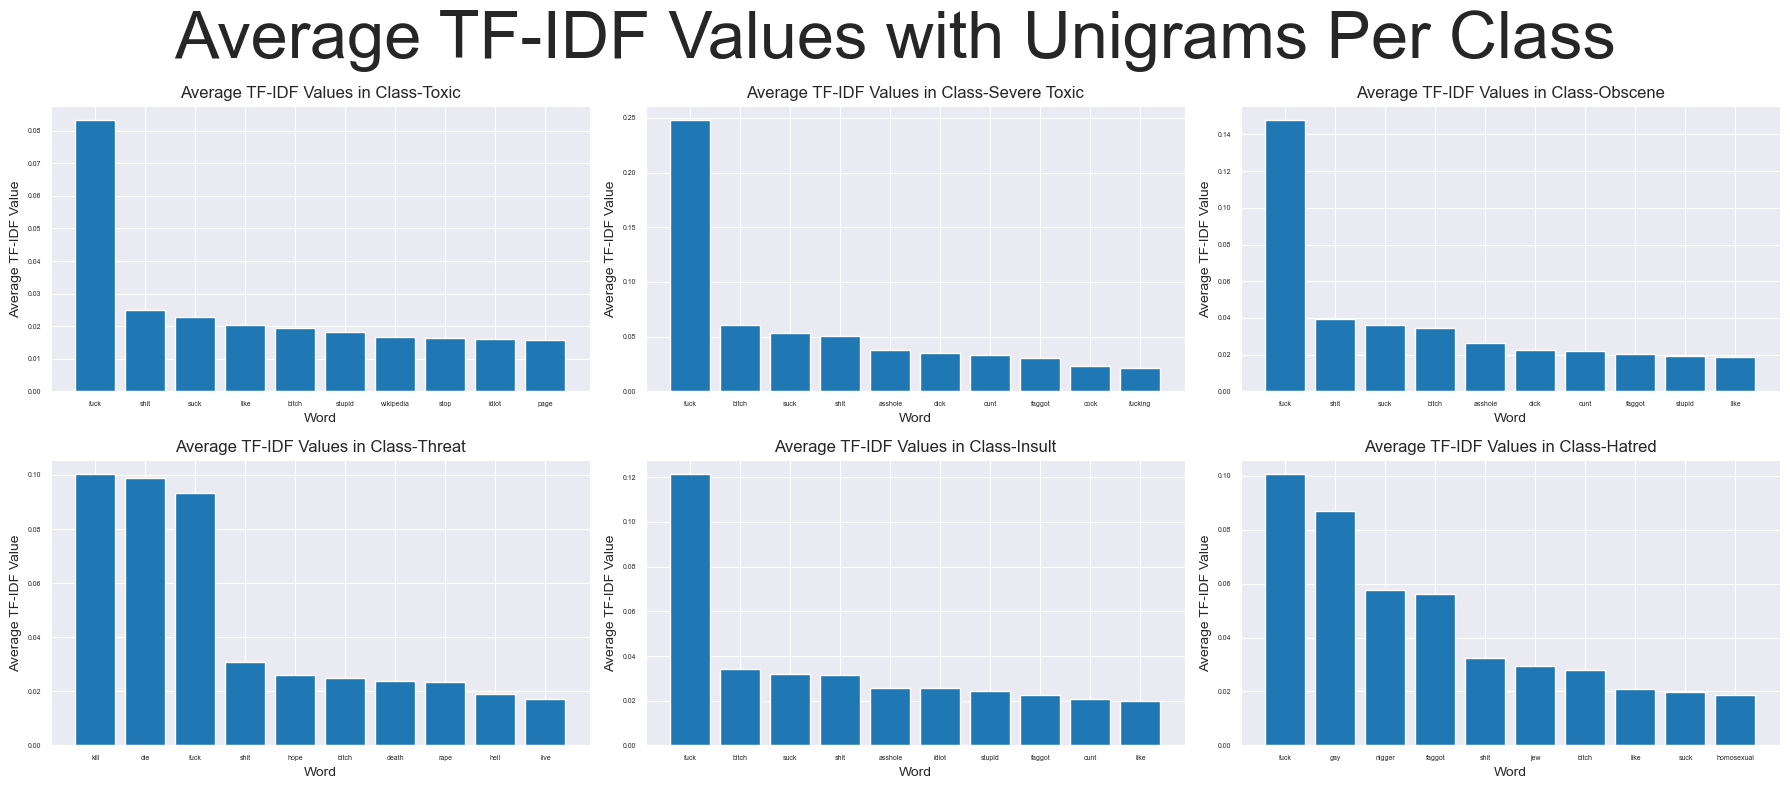

In [29]:
fig, axs = plt.subplots(2,3,figsize=(18,8))
fig.suptitle("Average TF-IDF Values with Unigrams Per Class",fontsize=48)
axs=axs.flatten()
for data,ax,col in zip(top_tf_idf_val,axs,y.columns):
    words=data[0][:10]
    avg_tf_idf_value=data[1][:10]    
    rects1 = ax.bar(words, avg_tf_idf_value)
    ax.set_ylabel('Average TF-IDF Value')
    ax.set_xlabel("Word")
    ax.set_title('Average TF-IDF Values in Class-'+str(col))
fig.tight_layout()
plt.show()

-----------

From the above plots between the words and their tf-idf values for each category, we can see that some words are repeating in all the categories and have the same importance in all the categories.

Now we can look at the separation of the data points between the two main categories which are the **toxic and non-toxic**. Since there are a lot of dimensions after the vectorization we can use some dimensionality reduction techniques to reduce the data complexity. The TSNE model or the PCA model can be used here for this. The TSNE is a bit computationally expensive so, the PCA model can be used in this case.

Also, the y variable has multiple lables that should be converted to a single column.

----

In [41]:
def y_single(data):
    res=[]
    for row in data:
        if (sum(row)==0):
            res.append(0)
        else:
            res.append(1)
    return np.array(res)

In [42]:
y_tsne = []

In [43]:
y_tsne = y_single(y.values)

In [37]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)

In [38]:
pca_values = pca.fit_transform(x_uni_tfidf)

In [44]:
pca_data = np.vstack((pca_values.T, y_tsne)).T

In [45]:
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

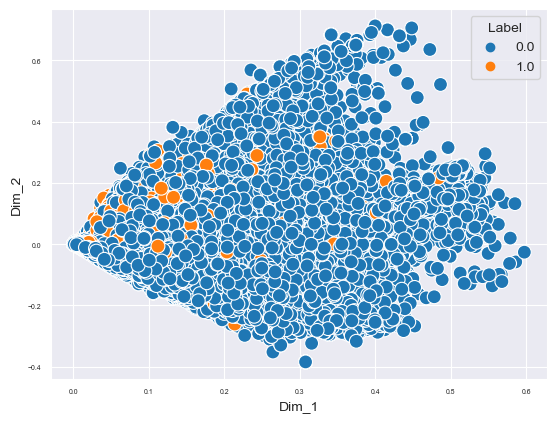

In [49]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

------------

From the plot it can be seen that there are a lot of overlaps between the toxic and non toxic data. So let us proceed to the **bigram tf-idf** approach.

### 1.2 Bigram TF-IDF

In [53]:
bigram_tfidf = TfidfVectorizer(min_df=10,max_features=10000,ngram_range=(2,2),stop_words='english')

In [54]:
x_bi_tfidf = bigram_tfidf.fit_transform(x)

----------

Getting the top tf-idf values per class

-----

In [55]:
top_tf_idf_val=[]
for col in y.columns:
    index=y[y[col]==1].index
    filtered_data=x.loc[index]
    vec_data=bigram_tfidf.transform(filtered_data)
    vec_data=vec_data.A

    #finding the indices of top TF-IDF values across the output

    indices=np.dstack(np.unravel_index(np.argsort(vec_data.ravel()), vec_data.shape))[0][::-1]
    feat=bigram_tfidf.get_feature_names_out()
    avg_tf_idf_scores=dict()

    for index in indices:
        if feat[index[1]] in avg_tf_idf_scores:
            value=avg_tf_idf_scores[feat[index[1]]]
            value.append(vec_data[index[0]][index[1]])
            avg_tf_idf_scores[feat[index[1]]]=value
        else:
            avg_tf_idf_scores[feat[index[1]]]=[vec_data[index[0]][index[1]]]

    # TF-IDF value is not same for the same word. as it is depends on 
    #TF value and IDF value
    #TF value will change based on the input. so finding average TF-IDF value

    for key in avg_tf_idf_scores:

        value=np.array(avg_tf_idf_scores[key])
        avg_tf_idf_scores[key]= np.mean(value)

    avg_tf_idf_scores={k: v for k, v in sorted(avg_tf_idf_scores.items(),
                                    key=lambda item: item[1],reverse=True)}

    top_tf_idf_val.append((list(avg_tf_idf_scores.keys()),list(avg_tf_idf_scores.values())))

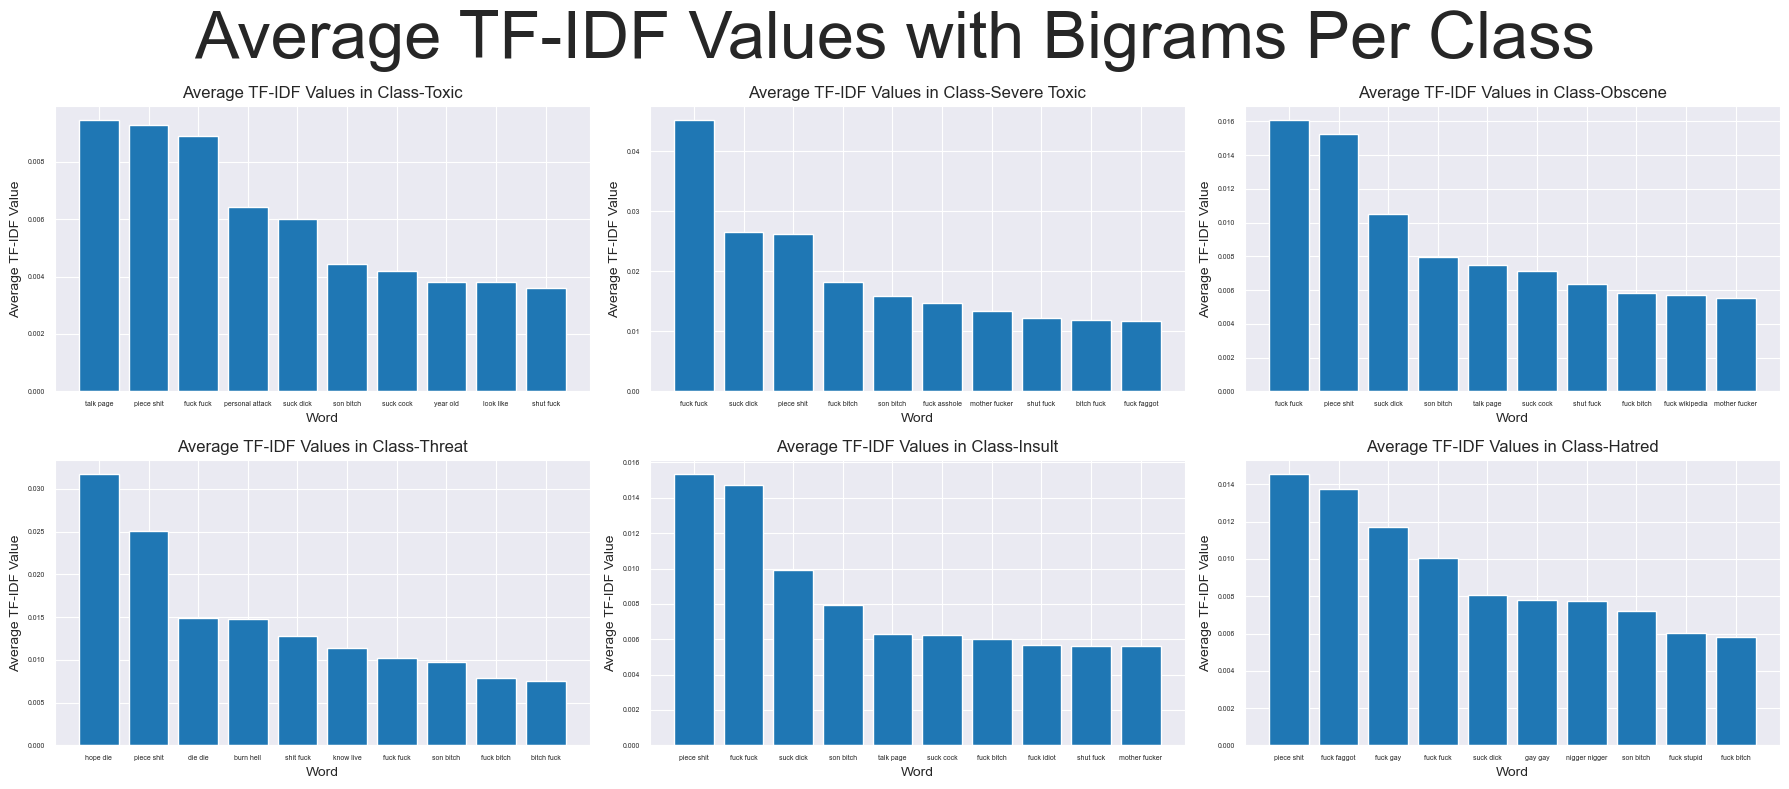

In [56]:
fig, axs = plt.subplots(2,3,figsize=(18,8))
fig.suptitle("Average TF-IDF Values with Bigrams Per Class",fontsize=48)
axs=axs.flatten()
for data,ax,col in zip(top_tf_idf_val,axs,y.columns):
    words=data[0][:10]
    avg_tf_idf_value=data[1][:10]    
    rects1 = ax.bar(words, avg_tf_idf_value)
    ax.set_ylabel('Average TF-IDF Value')
    ax.set_xlabel("Word")
    ax.set_title('Average TF-IDF Values in Class-'+str(col))
fig.tight_layout()
plt.show()

-----------

From the above plots between the words and their tf-idf values for each category, we can see that very few two word phrases are repeating in all the categories and have the same importance in all the categories. The results have improved a bit from the previous unigram case

Let us look at the plot of the PCA.

----

In [57]:
pca_values = pca.fit_transform(x_bi_tfidf)
pca_data = np.vstack((pca_values.T, y_tsne)).T
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

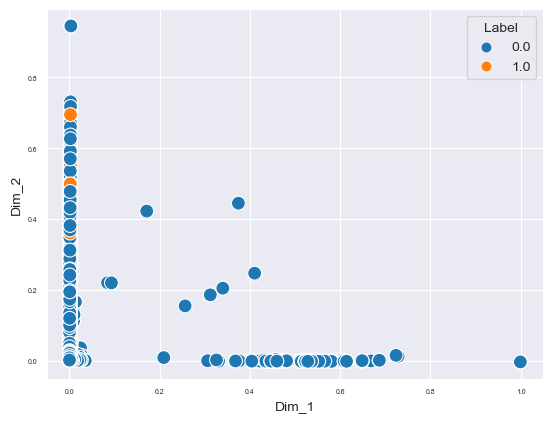

In [58]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

----------------

The overlap of the two categories became much more intense in the bigram case.

Let us try with the trigram option.

### 1.3 Trigram TF-IDF

In [59]:
trigram_tfidf = TfidfVectorizer(min_df=10,max_features=10000,ngram_range=(3,3),stop_words='english')

In [60]:
x_tri_tfidf = trigram_tfidf.fit_transform(x)

----------

Getting the top tf-idf values per class

-----

In [63]:
top_tf_idf_val=[]
for col in y.columns:
    index=y[y[col]==1].index
    filtered_data=x.loc[index]
    vec_data=trigram_tfidf.transform(filtered_data)
    vec_data=vec_data.A

    #finding the indices of top TF-IDF values across the output

    indices=np.dstack(np.unravel_index(np.argsort(vec_data.ravel()), vec_data.shape))[0][::-1]
    feat=trigram_tfidf.get_feature_names_out()
    avg_tf_idf_scores=dict()

    for index in indices:
        if feat[index[1]] in avg_tf_idf_scores:
            value=avg_tf_idf_scores[feat[index[1]]]
            value.append(vec_data[index[0]][index[1]])
            avg_tf_idf_scores[feat[index[1]]]=value
        else:
            avg_tf_idf_scores[feat[index[1]]]=[vec_data[index[0]][index[1]]]

    # TF-IDF value is not same for the same word. as it is depends on 
    #TF value and IDF value
    #TF value will change based on the input. so finding average TF-IDF value

    for key in avg_tf_idf_scores:

        value=np.array(avg_tf_idf_scores[key])
        avg_tf_idf_scores[key]= np.mean(value)

    avg_tf_idf_scores={k: v for k, v in sorted(avg_tf_idf_scores.items(),
                                    key=lambda item: item[1],reverse=True)}

    top_tf_idf_val.append((list(avg_tf_idf_scores.keys()),list(avg_tf_idf_scores.values())))

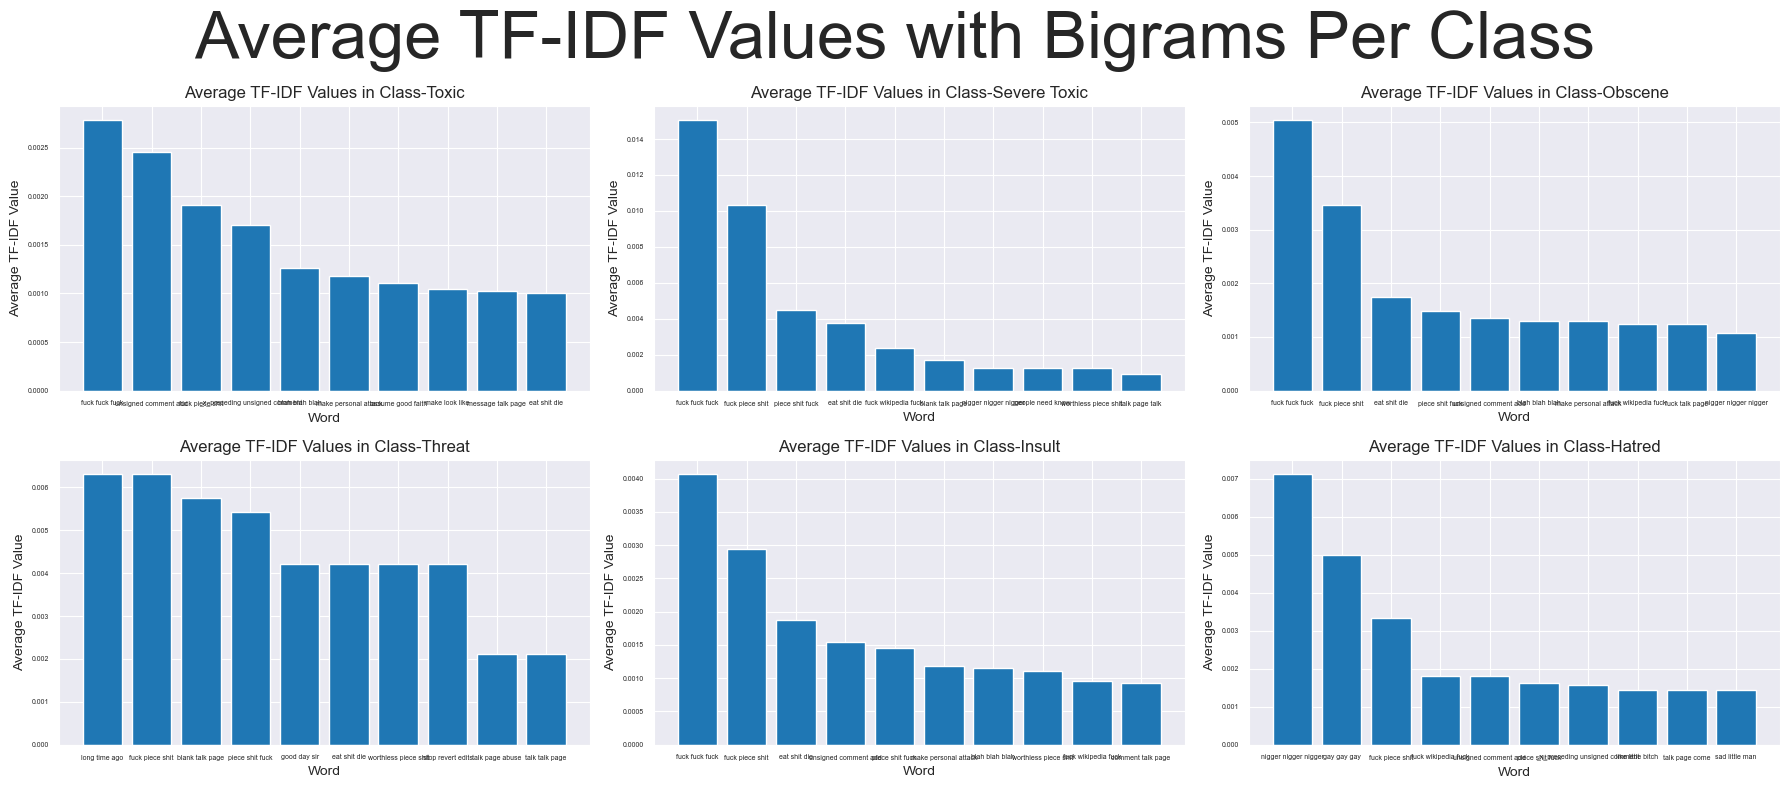

In [64]:
fig, axs = plt.subplots(2,3,figsize=(18,8))
fig.suptitle("Average TF-IDF Values with Bigrams Per Class",fontsize=48)
axs=axs.flatten()
for data,ax,col in zip(top_tf_idf_val,axs,y.columns):
    words=data[0][:10]
    avg_tf_idf_value=data[1][:10]    
    rects1 = ax.bar(words, avg_tf_idf_value)
    ax.set_ylabel('Average TF-IDF Value')
    ax.set_xlabel("Word")
    ax.set_title('Average TF-IDF Values in Class-'+str(col))
fig.tight_layout()
plt.show()

-----------

From the above plots between the words and their tf-idf values for each category, we can see that the number of three word phrases repeating in all the categories have increase a bit from the bigram case.

Let us look at the plot of the PCA.

----

In [65]:
pca_values = pca.fit_transform(x_tri_tfidf)
pca_data = np.vstack((pca_values.T, y_tsne)).T
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

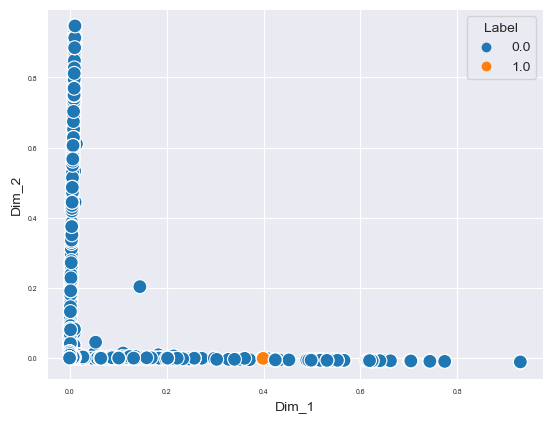

In [66]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

----------------

The overlap of the two categories became even more intense in the trigram case.

Anyways tf-idf method cannot preserve the semantic meaning of the words and the relationships between them. So, let us try with the combination of tf-idf and average word2vec approach.

### 2. TF-IDF weighted average Word2Vec

In [7]:
tf_idf_w2v = TfidfVectorizer(min_df=10,ngram_range=(1,1),stop_words='english',use_idf=True)
tf_idf_w2v.fit(x.values)
tfidf_dict = dict(zip(tf_idf_w2v.get_feature_names_out(), list(tf_idf_w2v.idf_)))
tfidf_words = set(tf_idf_w2v.get_feature_names_out())

In [69]:
def comp_tfidf_weighted_w2v(data,w2v_words,tfidf_words,w2v_dict,tfidf_dict):
    tfidf_w2v = []
    for sentence in data:
        vector = np.zeros(300) 
        # as word vectors are of zero length
        tf_idf_weight =0;
        # num of words with a valid vector in the sentence/review
        for word in sentence.split(): 
            # for each word in a review/sentence
            if (word in w2v_words) and (word in tfidf_words):
                vec = w2v_dict[word] 
                # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and 
                #the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = tfidf_dict[word]*(sentence.count(word)/len(sentence.split()))
                # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v.append(vector)
    return np.array(tfidf_w2v)

In [70]:
x_tfidf_w2v=comp_tfidf_weighted_w2v(x.values,w2v_words,tfidf_words,w2v_dict,tfidf_dict)

In [71]:
x_tfidf_w2v.shape

(158743, 300)

-------------

Applying pca on the word2vec data

-----

In [72]:
pca_values = pca.fit_transform(x_tfidf_w2v)
pca_data = np.vstack((pca_values.T, y_tsne)).T
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

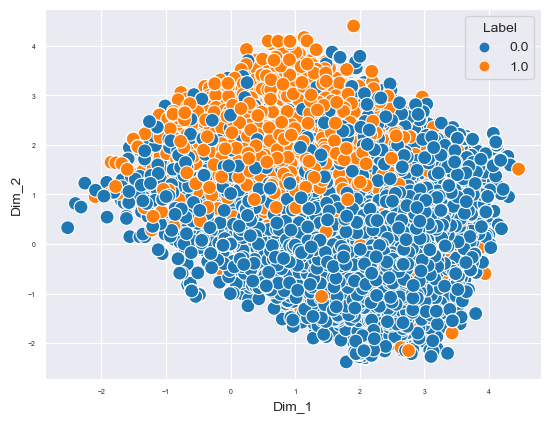

In [73]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

------

This looks much better than any of the above normal tf-idf cases. There is a clear partition between the two classes and the amount of overlap has reduced a lot. So, it is best to continue with the **tf-idf and word2vec** combined model.

In [75]:
x_tfidf_w2v_df = pd.DataFrame(x_tfidf_w2v)
x_tfidf_w2v_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.051367,-0.060495,0.001149,-0.049499,0.029956,-0.145452,0.086651,-0.000229,0.064938,-0.536234,...,-0.015343,-0.158155,-0.082105,0.091479,0.108467,0.030422,-0.005188,-0.003624,0.038748,0.181494
1,0.077654,0.083294,0.137685,0.078101,0.008173,-0.049521,0.008864,-0.071333,0.035709,-0.788647,...,-0.028346,0.098004,-0.125618,0.067190,0.184657,0.127138,0.205400,0.043030,0.080688,-0.006079
2,-0.284304,0.001876,0.023268,0.028583,0.042766,0.063144,-0.146772,0.056002,0.172073,-1.142111,...,0.098520,-0.078259,-0.090264,-0.095416,-0.019609,-0.153735,-0.002546,0.070028,0.077496,0.125922
3,-0.221880,0.030425,0.071590,-0.156064,-0.031576,0.028836,-0.090924,0.163952,-0.048329,-1.188217,...,0.054491,-0.033830,-0.026168,0.061329,0.075770,0.200697,0.002465,-0.116672,0.059649,-0.067360
4,0.041364,-0.055539,0.264545,-0.351085,0.183440,0.052547,-0.114125,-0.145492,-0.153485,-0.621002,...,0.048379,0.120352,0.014540,-0.138365,-0.111523,-0.004556,0.024031,-0.004104,-0.278342,0.194327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158738,0.024454,0.046005,-0.113831,-0.132215,0.008551,0.063240,-0.024901,0.105503,-0.006373,-1.530968,...,-0.067110,0.006946,0.118147,0.158259,0.110933,0.028245,-0.085713,-0.095958,0.007209,-0.056857
158739,0.334859,0.012415,0.153593,-0.124930,-0.073279,0.034587,-0.089429,-0.016419,0.249144,-0.831725,...,0.267108,-0.331805,-0.096106,0.000979,0.122380,-0.629693,0.056388,0.370078,-0.086796,0.377776
158740,0.132612,0.093696,0.039911,-0.208920,-0.156506,0.039680,0.092735,-0.097160,-0.355542,-0.799413,...,-0.159605,-0.004408,-0.093319,0.113729,0.163493,0.052583,0.125530,0.188881,-0.200602,-0.208021
158741,-0.226283,-0.112413,-0.169718,-0.211149,0.049545,0.164669,-0.129212,-0.046732,0.092141,-1.198321,...,0.068701,-0.116216,-0.040594,0.025550,-0.071042,-0.289346,0.053791,-0.165067,0.111406,0.173672


In [78]:
x_tfidf_w2v_df.to_csv('encoded_text_w2v.csv')

In [79]:
x_uni_tfidf_df = pd.DataFrame(x_uni_tfidf)

In [80]:
x_uni_tfidf_df.to_csv('encoded_text_uni.csv')

In [81]:
x_bi_tfidf_df = pd.DataFrame(x_bi_tfidf)
x_bi_tfidf_df.to_csv('encoded_text_bi.csv')

In [82]:
x_tri_tfidf_df = pd.DataFrame(x_tri_tfidf)
x_tri_tfidf_df.to_csv('encoded_text_tri.csv')

In [83]:
y

,Toxic,Severe Toxic,Obscene,Threat,Insult,Hatred
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
165999,0,0,0,0,0,0
166000,0,0,0,0,0,0
166001,0,0,0,0,0,0
166002,0,0,0,0,0,0


In [84]:
y.to_csv('targets.csv')

------------------

The word2vec model is finalized and the vectorized data is saved into a csv file, so that it can be used while building the models.

The next step will be the model building.

In [8]:
joblib.dump(tfidf_dict,'tfidf_dict.pkl')
joblib.dump(tfidf_words,'tfidf_words.pkl')
joblib.dump(w2v_dict,'w2v_dict.pkl')
joblib.dump(w2v_words,'w2v_words.pkl')

['w2v_words.pkl']

In [22]:
joblib.dump(unigram_tfidf, 'unigram_tfidf.pkl')

['unigram_tfidf.pkl']